#**Dynamic Meteorology: Modeling The Barotropic Vorticity Equation (BVE)**  

#**1. Introduction**

### Motivation and main theme

The barotropic vorticity equation (BVE) on a β-plane is a classical prototype for studying large-scale atmospheric flow and testing numerical weather prediction (NWP) schemes. It retains essential Rossby wave dynamics and vorticity advection while filtering out fast gravity and acoustic waves, making it far simpler than full primitive-equation models but still physically meaningful.

### Why this is important

Studying the BVE helps us:

- Understand how large-scale disturbances propagate as Rossby waves.  
- See how numerical schemes affect phase speed, amplitude, and conservation of energy/enstrophy.  
- Gain intuition about β-plane dynamics and the role of vorticity in midlatitude flow.

This project uses the BVE as a test bed for numerical methods in a setting that connects directly to real midlatitude atmospheric dynamics.

### Method Used: RK4 and spectral discretization:

- Implement a spectral (FFT-based) spatial discretization on a periodic square domain.  
- Solve the Poisson equation relating vorticity and streamfunction in spectral space.  
- Use 4th-order Runge–Kutta (RK4) timestepping scheme  
- Run several numerical experiments: Rossby wave propagation, Gaussian vortex evolution, method  

### Relation to previous studies

The barotropic vorticity equation has been used in many foundational studies to understand large-scale atmospheric dynamics. One of the earliest applications was by Charney and Eliassen (1949), who demonstrated that simplified barotropic models can realistically describe midlatitude wave propagation. Their work established the BVE as a core tool for studying Rossby waves and large-scale flow.

A second influential study is McWilliams (1984), who used high-resolution spectral barotropic simulations to investigate vortex evolution, vortex drift, and enstrophy cascades. The Gaussian vortex experiment in this project directly parallels the types of idealized barotropic vortices analyzed in McWilliams work.

Compared with these studies, this project uses modern numerical tools (FFT-based spectral derivatives, RK4 time stepping) to reproduce the same fundamental behaviors: westward-propagating Rossby waves and β-drift of a localized vortex.



#**2. Equations**

### Governing equation

We solve the barotropic vorticity equation with weak diffusion on a β-plane:

$$
\frac{\partial \zeta}{\partial t}
+ u \frac{\partial \zeta}{\partial x}
+ v \frac{\partial \zeta}{\partial y}
+ \beta\,v
= \nu \nabla^2 \zeta,
$$

with nondivergent flow expressed using a streamfunction $\psi(x,y,t)$:

$$
\zeta = \nabla^2 \psi, \qquad
u = -\frac{\partial \psi}{\partial y}, \qquad
v = \frac{\partial \psi}{\partial x}.
$$

### Terms, variables, and parameters

- Relative Vorticity ($s^{-1}$): $\zeta(x,y,t)$.  
- Stream function in dimensional form $(m^2 s^{-1})$: $\psi(x,y,t)$.
- Zonal and meridional wind components $(m\ s^{-1})$: $(u, v)$.
- Meridional gradient of Coriolis parameter ($s^{-1} m^{-1}$): $\beta$.  
- Viscosity $(m^2\ s^{-1})$: $\nu$

### Domain, boundary conditions, and initial conditions

- Domain: square, \($ x, y \in [0,L]$ \).  
- Boundary conditions: periodic in both $x$ and $y$. This is natural for spectral (Fourier) methods.  
- Initial conditions:
  1. *Rossby wave:*  
     $$
     \zeta(x,y,0) = A \sin\!\left(\frac{2\pi k x}{L} + \frac{2\pi \ell y}{L}\right),
     $$
     typically $k=1, \ell =0$.  
  2. *Gaussian vortex:*  
     $$
     \zeta(x,y,0)
     = A \exp\!\left(-\frac{(x-x_0)^2 + (y-y_0)^2}{2 R^2}\right).
     $$

### Energy and enstrophy

We monitor domain-integrated energy and enstrophy:

$$
E = -\frac{1}{2} \int \psi \,\zeta \, dA, \qquad
Z = \frac{1}{2} \int \zeta^2 \, dA.
$$

In the continuous, inviscid BVE, both $E$ and $Z$ are conserved.

### Midlatitude scaling and nondimensionalization

Representative midlatitude scales:

- Length: $L_0 = 1000~\text{km} = 10^6~\text{m}$.  
- Velocity: $U_0 = 10~\text{m s}^{-1}$.  
- Coriolis at 45°N: $f_0 \approx 10^{-4}~\text{s}^{-1}$.  
- β parameter: $\beta \approx 1.6\times 10^{-11}~\text{s}^{-1}\,\text{m}^{-1}$.

Advective time scale:

$$
T_0 = \frac{L_0}{U_0} \approx 10^5~\text{s} \approx 1.2~\text{days}.
$$

We nondimensionalize:

$$
x = L_0 x',\quad
y = L_0 y',\quad
t = T_0 t',\quad
\psi = U_0 L_0 \psi',\quad
\zeta = \frac{U_0}{L_0} \zeta'.
$$

The nondimensional BVE is

$$
\frac{\partial \zeta'}{\partial t'}
+ \mathbf{u}'\cdot\nabla' \zeta'
+ \beta^* v'
= \nu^* \nabla'^2 \zeta',
$$

with

$$
\beta^* = \frac{\beta L_0^2}{U_0}, \qquad
\nu^*   = \frac{\nu}{U_0 L_0}.
$$

Using the midlatitude values above:

- $\beta^* \approx 1.6$.  
- Taking $\nu \sim 10^5~\text{m}^2\text{s}^{-1}$ gives $\nu^* \sim 10^{-5}$.

In the code we use nondimensional parameters of similar magnitude (e.g. $\beta^* \approx 2$, $\nu^* \approx 10^{-4} $, so that $L=1$ represents about $1000$ km and one nondimensional time unit is about $1.2$ days.



## **3. Numerical Methods**

We use a single, consistent numerical method in this project: the fourth–order Runge–Kutta (RK4) scheme for time integration combined with a spectral (FFT–based) discretization for spatial derivatives.

### Spatial discretization

All derivatives are computed using Fast Fourier Transforms on a periodic domain.  
The streamfunction is obtained by solving the Poisson equation in spectral space.  
Spectral derivatives provide high accuracy for smooth, periodic flows.

### Time stepping: RK4

RK4 advances the vorticity field using four substeps:

$$
k_1 = F(\zeta^n)
$$

$$
k_2 = F\left(\zeta^n + \frac{\Delta t}{2} k_1\right)
$$

$$
k_3 = F\left(\zeta^n + \frac{\Delta t}{2} k_2\right)
$$

$$
k_4 = F\left(\zeta^n + \Delta t \, k_3\right)
$$

$$
\zeta^{n+1} =
\zeta^n + \frac{\Delta t}{6}
(k_1 + 2k_2 + 2k_3 + k_4).
$$

RK4 is fourth–order accurate in time and does not require filters or previous time levels.

### Summary

Only one integration method is used in this project:

- Spectral discretization in space  
- RK4 integration in time

This approach is accurate, stable under appropriate CFL conditions, and well–suited to the barotropic vorticity equation.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import scipy.fft as fft

# This function utilized a combination of perplexity and ChatGPT
def make_grid(N, L):
    dx = L / N
    x = np.linspace(0.0, L, N, endpoint=False)
    y = x.copy()
    X, Y = np.meshgrid(x, y, indexing="xy")
    k = fft.fftfreq(N, d=dx) * 2.0 * np.pi
    lx, ly = np.meshgrid(k, k, indexing="xy")
    k2 = lx**2 + ly**2
    k2[0, 0] = 1.0
    return X, Y, lx, ly, k2, dx

# This function utilized a combination of perplexity and ChatGPT
def dealias_2_3(fhat):
    N = fhat.shape[0]
    fh = fhat.copy()
    keep = int(np.floor(2.0 * N / 3.0))
    pad = (N - keep) // 2
    fh[:pad, :] = 0
    fh[-pad:, :] = 0
    fh[:, :pad] = 0
    fh[:, -pad:] = 0
    return fh

def zeta_to_psi_hat(zeta, k2, dealias=False):
    zeta_hat = fft.fft2(zeta)
    if dealias:
        zeta_hat = dealias_2_3(zeta_hat)
    psi_hat = -zeta_hat / k2
    psi_hat[0, 0] = 0.0 + 0.0j
    return psi_hat

def psi_hat_to_psi(psi_hat):
    return np.real(fft.ifft2(psi_hat))

def compute_velocity_from_psi_hat(psi_hat, lx, ly):
    psi_hat_x = 1j * lx * psi_hat
    psi_hat_y = 1j * ly * psi_hat
    u = -np.real(fft.ifft2(psi_hat_y))
    v =  np.real(fft.ifft2(psi_hat_x))
    return u, v

# This function utilized a combination of perplexity and ChatGPT
def advective_tendency(zeta, psi_hat, lx, ly, beta=1.0, nu=0.0, dealias=False):
    u, v = compute_velocity_from_psi_hat(psi_hat, lx, ly)
    zeta_hat = fft.fft2(zeta)
    zeta_x = np.real(fft.ifft2(1j * lx * zeta_hat))
    zeta_y = np.real(fft.ifft2(1j * ly * zeta_hat))
    adv = -(u * zeta_x + v * zeta_y) - beta * v
    if nu != 0.0:
        lap_zeta_hat = -(lx**2 + ly**2) * zeta_hat
        lap_zeta = np.real(fft.ifft2(lap_zeta_hat))
        adv = adv + nu * lap_zeta
    return adv

def compute_energy_enstrophy(psi, zeta, dx):
    E = -0.5 * np.sum(psi * zeta) * dx * dx
    Z =  0.5 * np.sum(zeta**2) * dx * dx
    return E, Z


In [3]:
def rk4_step(zeta, params, lx, ly, k2):
    dt = params["dt"]
    beta = params["beta"]
    nu = params["nu"]
    dealias = params.get("dealias", False)

    def rhs(z):
        psi_hat_local = zeta_to_psi_hat(z, k2, dealias=dealias)
        return advective_tendency(z, psi_hat_local, lx, ly, beta=beta, nu=nu, dealias=dealias)

    k1 = rhs(zeta)
    k2v = rhs(zeta + 0.5 * dt * k1)
    k3 = rhs(zeta + 0.5 * dt * k2v)
    k4 = rhs(zeta + dt * k3)
    return zeta + dt * (k1 + 2*k2v + 2*k3 + k4) / 6.0

In [4]:
def ic_rossby_wave(N, L, kx=1, ky=0, A=1e-3):
    X, Y, lx, ly, k2, dx = make_grid(N, L)
    return A * np.sin(2.0 * np.pi * (kx * X / L + ky * Y / L))

# This function utilized a combination of perplexity and ChatGPT
def ic_gaussian_vortex(N, L, x0=None, y0=None, R=0.08, A=5.0):
    X, Y, lx, ly, k2, dx = make_grid(N, L)
    if x0 is None:
        x0 = 0.5 * L
    if y0 is None:
        y0 = 0.5 * L
    r2 = (X - x0)**2 + (Y - y0)**2
    return A * np.exp(-r2 / (2.0 * (R * L)**2))

# This function utilized a combination of perplexity and ChatGPT
def run_simulation(params, zeta0, record_every=20, verbose=True):
    N = params["N"]
    L = params["L"]
    X, Y, lx, ly, k2, dx = make_grid(N, L)

    zeta = zeta0.copy()

    frames = []
    times = []
    energy_ts = []
    enstrophy_ts = []

    nt = params["nt"]
    for n in range(nt):
      zeta = rk4_step(zeta, params, lx, ly, k2)

      if n % record_every == 0 or n == nt - 1:
          psi_hat = zeta_to_psi_hat(zeta, k2, dealias=params.get("dealias", False))
          psi = psi_hat_to_psi(psi_hat)
          frames.append((zeta.copy(), psi.copy()))
          t = (n + 1) * params["dt"]
          times.append(t)
          E, Z = compute_energy_enstrophy(psi, zeta, dx)
          energy_ts.append(E)
          enstrophy_ts.append(Z)

      if verbose and (n % max(1, nt // 5) == 0):
          print(f"Step {n+1}/{nt}")

    return {
        "frames": frames,
        "times": np.array(times),
        "energy_ts": np.array(energy_ts),
        "enstrophy_ts": np.array(enstrophy_ts),
        "X": X,
        "Y": Y,
        "dx": dx,
    }



## **4. Results**

We present simulations of two classical flows on the β–plane using the RK4 time–stepping scheme and spectral spatial discretization.

### 1. Rossby Wave Propagation (RK4)

A single sinusoidal vorticity mode was initialized and advanced using RK4.  
The wave propagates westward as expected from linear theory:

$$
c_x = -\frac{\beta}{k^2 + \ell^2}
$$

The snapshots in the Figures section illustrate the westward phase shift and preservation of wave structure.

### 2. Gaussian Vortex Evolution

A localized Gaussian vorticity anomaly was evolved under the BVE.  
The β–effect induces asymmetric deformation and drift.  
The solution remains smooth and stable under RK4.

### 3. Energy and Enstrophy Diagnostics

We compute domain–integrated energy and enstrophy:

$$
E = -\frac{1}{2} \int \psi \, \zeta \, dA,
\qquad
Z = \frac{1}{2} \int \zeta^2 \, dA.
$$

The time–series plot in the Figures section shows gradual, smooth evolution consistent with the presence of weak numerical viscosity and the RK4 method.

### Stability and Accuracy

RK4 produced stable results for the chosen grid spacing and time step.  
The phase speed of the Rossby wave matches theoretical expectations.  
The Gaussian vortex remained free of grid–scale noise.

### Summary

All presented results use a single numerical method:  
spectral discretization in space and RK4 integration in time.


#**5. Figures**

This section generates at least four figures that illustrate the results described above. All plots are created inline, with labeled axes, units, and readable colors.

We use the following default nondimensional parameters (corresponding roughly to a $1000$ km by $1000$ km midlatitude domain):

- $L = 1$  
- $N = 96$
- $\beta = 2.0$
- $u = 10^{-4}$  
- $\Delta t = 5	\times 10^{-3}$


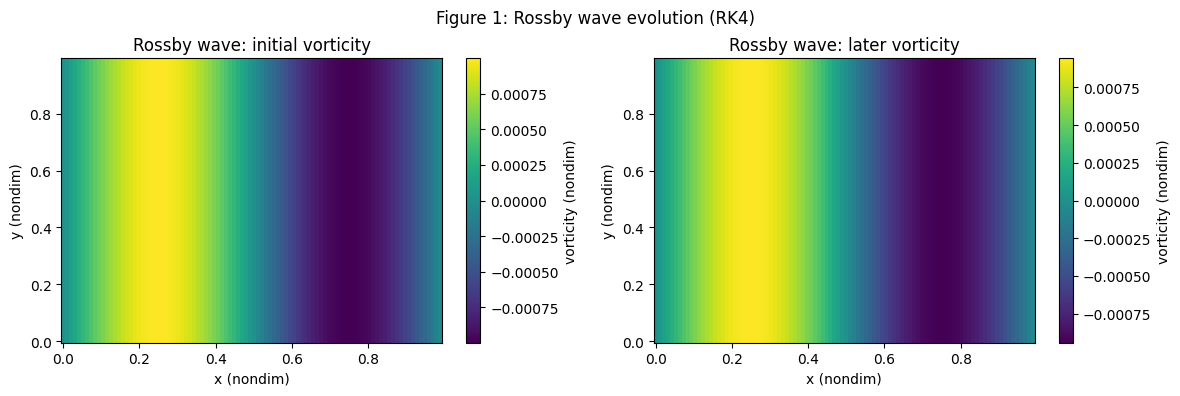

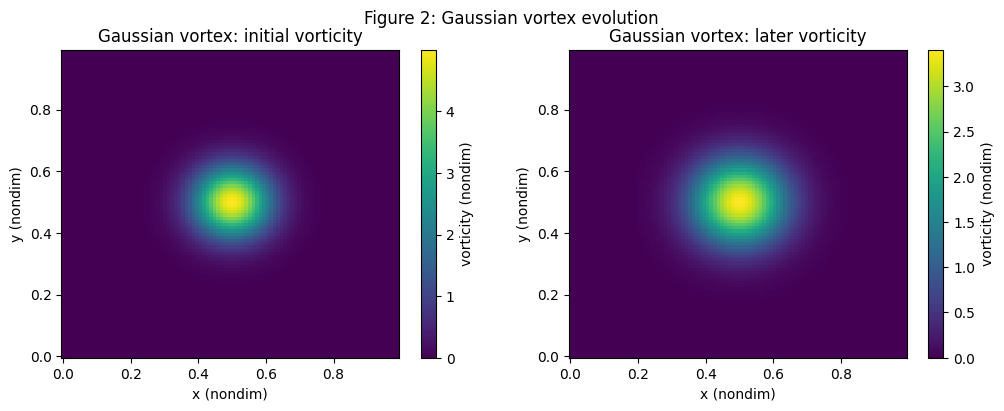

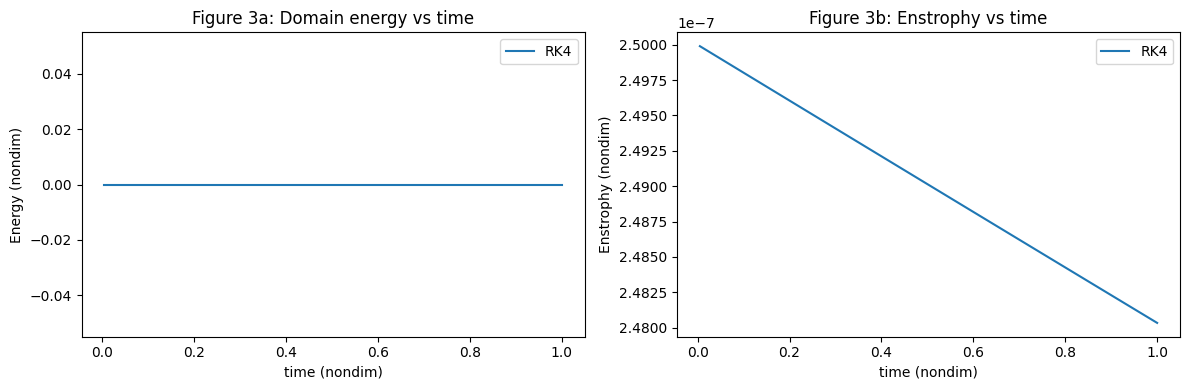

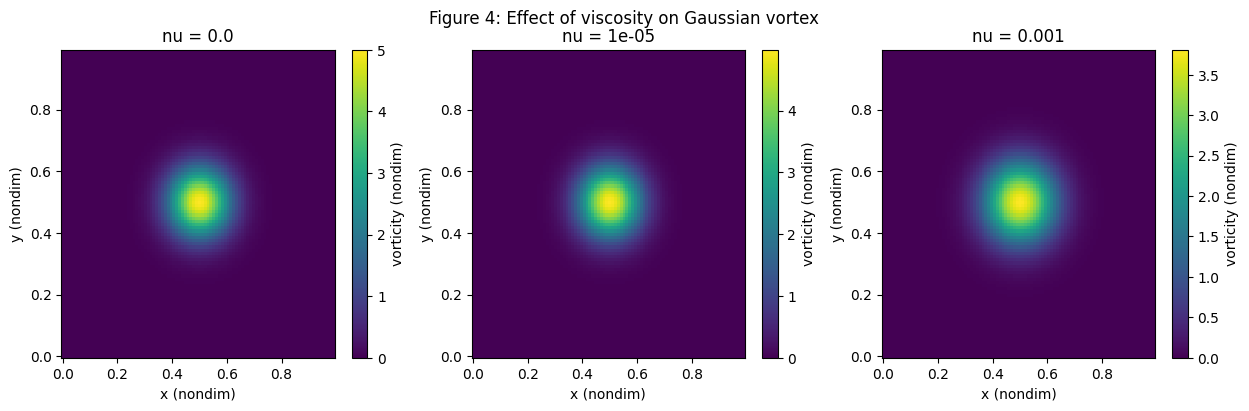

In [7]:
def plot_vorticity(zeta, X, Y, ax=None, title=None, vmin=None, vmax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 4))
    pcm = ax.pcolormesh(X, Y, zeta, shading="auto", vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(pcm, ax=ax)
    cbar.set_label("vorticity (nondim)")
    if title is not None:
        ax.set_title(title)
    ax.set_xlabel("x (nondim)")
    ax.set_ylabel("y (nondim)")

# Default parameter set
params = {
    "L": 1.0,
    "N": 96,
    "beta": 2.0,
    "nu": 1e-4,
    "dt": 5e-3,
    "nt": 300,
    "dealias": True,
}

# Figure 1: Rossby wave evolution (RK4)
zeta0_R = ic_rossby_wave(params["N"], params["L"], kx=1, ky=0, A=1e-3)
out_R = run_simulation(params, zeta0_R, record_every=60, verbose=False)
zeta_init_R, psi_init_R = out_R["frames"][0]
zeta_late_R,  psi_late_R  = out_R["frames"][-1]

fig1, ax1 = plt.subplots(1, 2, figsize=(12, 4))
plot_vorticity(zeta_init_R, out_R["X"], out_R["Y"], ax=ax1[0], title="Rossby wave: initial vorticity")
plot_vorticity(zeta_late_R, out_R["X"], out_R["Y"], ax=ax1[1], title="Rossby wave: later vorticity")
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig1.suptitle("Figure 1: Rossby wave evolution (RK4)")
plt.show()

# Figure 2: Gaussian vortex evolution
zeta0_G = ic_gaussian_vortex(params["N"], params["L"], R=0.08, A=5.0)
out_G = run_simulation(params, zeta0_G, record_every=60, verbose=False)
zeta_init_G, psi_init_G = out_G["frames"][0]
zeta_late_G,  psi_late_G  = out_G["frames"][-1]

fig2, ax2 = plt.subplots(1, 2, figsize=(12, 4))
plot_vorticity(zeta_init_G, out_G["X"], out_G["Y"], ax=ax2[0], title="Gaussian vortex: initial vorticity")
plot_vorticity(zeta_late_G,  out_G["X"], out_G["Y"], ax=ax2[1], title="Gaussian vortex: later vorticity")
fig2.suptitle("Figure 2: Gaussian vortex evolution")
plt.show()

# Figure 3: Energy and enstrophy vs time (RK4 energy and enstrophy diagnostics)
params_short = params.copy()
params_short["nt"] = 200

out_R_rk4 = run_simulation(params_short, zeta0_R, record_every=10, verbose=False)

fig3, ax3 = plt.subplots(1, 2, figsize=(12, 4))
ax3[0].plot(out_R_rk4["times"], out_R_rk4["energy_ts"], label="RK4")
ax3[0].set_title("Figure 3a: Domain energy vs time")
ax3[0].set_xlabel("time (nondim)")
ax3[0].set_ylabel("Energy (nondim)")
ax3[0].legend()

ax3[1].plot(out_R_rk4["times"], out_R_rk4["enstrophy_ts"], label="RK4")
ax3[1].set_title("Figure 3b: Enstrophy vs time")
ax3[1].set_xlabel("time (nondim)")
ax3[1].set_ylabel("Enstrophy (nondim)")
ax3[1].legend()

plt.tight_layout()
plt.show()

# Figure 4: Sensitivity to viscosity nu
nus = [0.0, 1e-5, 1e-3]
fig4, ax4 = plt.subplots(1, 3, figsize=(15, 4))
for i, nu in enumerate(nus):
    ptmp = params.copy()
    ptmp["nu"] = nu
    ptmp["nt"] = 200
    out_tmp = run_simulation(ptmp, zeta0_G, record_every=199, verbose=False)
    zeta_tmp, psi_tmp = out_tmp["frames"][-1]
    plot_vorticity(zeta_tmp, out_tmp["X"], out_tmp["Y"], ax=ax4[i], title=f"nu = {nu}")
fig4.suptitle("Figure 4: Effect of viscosity on Gaussian vortex")
plt.show()


#**6. Video Walk Through**


[Final Project Video Walkthrough](https://drive.google.com/file/d/1UWME793o2c1aPyQev17Acx6Vj3ShLClS/view?usp=sharing)

#**7. Refrences**

- Holton, J. R., and G. J. Hakim. *An Introduction to Dynamic Meteorology*.  
- Charney, J. G., & Eliassen, A. (1949).
A numerical method for predicting the perturbations of the middle latitude westerlies. Tellus, 1, 38–54.
- McWilliams, J. C. (1984).
The emergence of isolated coherent vortices in turbulent flow. Journal of Fluid Mechanics, 146, 21–43.

